#### In this project, I study the TMDB 5000 Movie Dataset in various aspects. Generally, people have tendency to choose popular movies to watch and I wonder which factors affects the popularity of movies. Because of that, I decide to make an analysis about the movies data-set by exploring basic questions and then try to predict the popularity of movies.

- How is the distribution of movies according to genres?
- What are the leading production companies?
- How are the average votes distributed among movies?


In [1]:
import numpy as np
import pandas as pd
import helper as h
%matplotlib inline


#### Read the data file and create the dataframe.


In [2]:
movies_df = h.read_data('./tmdb_5000_movies.csv')
movies_df.head()


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


#### The column names in the 'movies_df'.


In [3]:
h.print_col_names(movies_df)


Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')


#### Prints the number of rows and columns.


In [4]:
# the number of rows and columns in the movies dataset
movies_num_rows, movies_num_cols = h.get_col_row_numbers(movies_df) # 4803 and 20
print(movies_num_rows, movies_num_cols)


4803 20


#### Get description of the 'movies_df'.


In [5]:
# describe the movies_df
description = h.get_description(movies_df)
description


,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


#### Prints the histogram of the 'movies_df'.


/Users/user/anaconda/envs/tensorflow/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/user/anaconda/envs/tensorflow/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/user/anaconda/envs/tensorflow/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:

[[<AxesSubplot:title={'center':'budget'}>
  <AxesSubplot:title={'center':'id'}>
  <AxesSubplot:title={'center':'popularity'}>]
 [<AxesSubplot:title={'center':'revenue'}>
  <AxesSubplot:title={'center':'runtime'}>
  <AxesSubplot:title={'center':'vote_average'}>]
 [<AxesSubplot:title={'center':'vote_count'}> <AxesSubplot:>
  <AxesSubplot:>]]


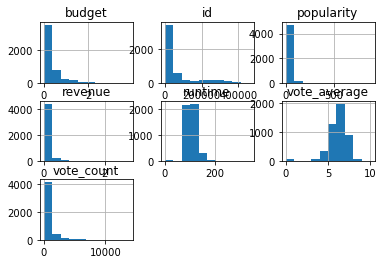

In [6]:
# histogram of movies_df
h.print_histogram(movies_df)


#### Get correlation matrix of the 'movies_df'.


<AxesSubplot:>

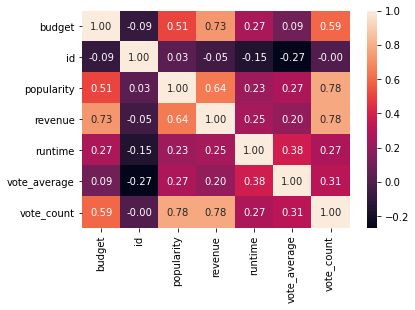

In [7]:
# correlation matrix for movies_df
h_map = h.get_correlation_matrix(movies_df)
h_map


#### 1) How is the distribution of movies according to genres?


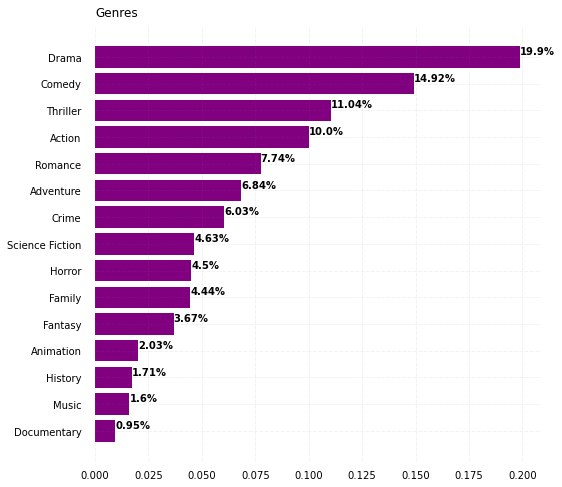

In [8]:
# plot movies according to genres
possible_genres = {'Documentary', 'History', 'Comedy', 'Action', 'Adventure', 'Drama', 'Romance',
                 'Crime', 'Music', 'Animation', 'Thriller', 'Fantasy', 'Science Fiction', 'Horror', 
                 'Family'}
genre_props = h.clean_and_plot(movies_df, 'genres', 'Genres', possible_genres, plot=True)


#### 2) What are the leading production companies?


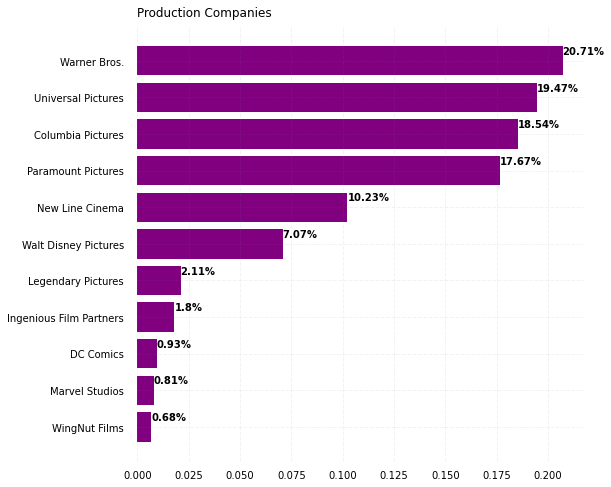

In [9]:
# plot movies according to production companies
possible_production_companies = {'Walt Disney Pictures', 'Columbia Pictures', 'Legendary Pictures',
                                 'Marvel Studios', 'Warner Bros.', 'DC Comics', 'Paramount Pictures', 
                                 'New Line Cinema', 'Universal Pictures', 'Ingenious Film Partners',
                                 'WingNut Films'}
production_companies_props = h.clean_and_plot(movies_df, 'production_companies', 'Production Companies', 
                                              possible_production_companies, plot=True)


#### 3) How are the average votes distributed among movies?


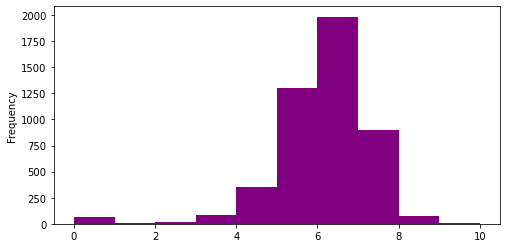

In [10]:
# plot movies according to vote average and save figure
h.print_save_vote_average(movies_df, 'vote_average')


#### Change Keyword list in the 'movies_df' dataframe into the list of keyword counts.


In [11]:
# get keyword counts for each movie
keyword_counts_list = h.get_keyword_counts(movies_df) 
movies_df['keywords'] = keyword_counts_list


#### Here is the Top 10 List of Movies...


In [12]:
# plot top 10 movies according to popularity
top_ten, cm = h.get_top10_by_popularity(movies_df)
top_ten.style.background_gradient(cmap=cm)


,Original Title,Popularity
546,Minions,875.581
95,Interstellar,724.248
788,Deadpool,514.57
94,Guardians of the Galaxy,481.099
127,Mad Max: Fury Road,434.279
28,Jurassic World,418.709
199,Pirates of the Caribbean: The Curse of the Black Pearl,271.973
82,Dawn of the Planet of the Apes,243.792
200,The Hunger Games: Mockingjay - Part 1,206.227
88,Big Hero 6,203.735


#### Get correlation matrix of the 'movies_df' after changing keyword list into the keyword count list.


<AxesSubplot:>

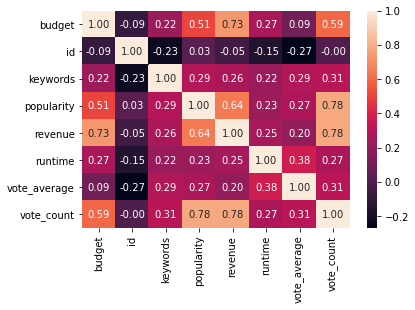

In [13]:
# correlation matrix for movies_df after keyword processing
h_map_2 = h.get_correlation_matrix(movies_df)
h_map_2


#### Here is the pre-processing section. The list of data cleansing methods applied is:
- Shuffling dataset
- Changing infinity values to nan
- Dropping columns and rows with all missing values
- Filling mean for nan values in numerical columns
- Dropping columns with all zeros


#### In the pre-processing, there are three important observations to mention about:
- There is no categorical column in the dataset. Because of that there is no need to apply specific operations related with handling categorical variables.
- There is no column or row with all missing so there is no need to handle these cases.
- There is only one row with all zeros and that row is dropped.


In [14]:
# preprocess dataset
features_df = h.preprocess_data(movies_df)


(4803, 4)
num_var len: 4
cat_cols len: 0
(4803, 4)
(4802, 4)


#### Setting X and y data using correlation matrix that obtained before.


In [15]:
# set X and y data
X = features_df[['budget', 'revenue', 'vote_count']]
y = features_df['popularity']


#### Scale data into the range [0, 1].


In [16]:
# scale data
X = h.scale_data(X)


/Users/user/anaconda/envs/tensorflow/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


#### Split data into the train and test.


In [17]:
# split data 
X_train, X_test, y_train, y_test = h.split_train_test(X, y)


#### Fit and predict data using Linear Regression model. Then, calculate r2 scores of both train and test data.


In [18]:
# fit data for Linear Regression and get r2 scores
linear_model = h.fit_data_linear(X_train, y_train)
test_score_linear = h.predict_get_score_data(X_test, y_test, linear_model)
train_score_linear = h.predict_get_score_data(X_train, y_train, linear_model)
train_score_linear, test_score_linear


(0.5727796765235524, 0.7371760183336925)

#### Fit and predict data using Support Vector Regression model. Then, calculate r2 scores of both train and test data.


In [19]:
# fit data for Support Vector Regression and get r2 scores
svm_model = h.fit_data_svm(X_train, y_train)
test_score_svm = h.predict_get_score_data(X_test, y_test, svm_model)
train_score_svm = h.predict_get_score_data(X_train, y_train, svm_model)
train_score_svm, test_score_svm


(0.36084452475274265, 0.49915463918845426)

#### Create a result matrix that holds results for performances of both models.


In [22]:
# form a dataframe for holding prediction scores
result_matrix = h.create_prediction_result_matrix(train_score_linear, train_score_svm, 
                                                  test_score_linear, test_score_svm)
result_matrix



,LR,SVR
Train Score,0.57,0.36
Test Score,0.74,0.50


#### What can be done in order to enhance these results? The answer could be using more features, more data, different optimization techniques or more powerful models. In the following works, I plan to learn and apply these techniques and go deeper.
